<a href="https://colab.research.google.com/github/FreemanMD/Image_Classification_with_CNN/blob/main/DL_Assignment_2_(Image_Classification_with_CNN)_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.set_option('display.max_columns', None)


In [2]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [4]:
from tensorflow.keras.datasets.fashion_mnist import load_data

In [6]:
(X_train, y_train) , (X_test, y_test) = load_data()

In [8]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

index number : 33618
shape (28, 28)


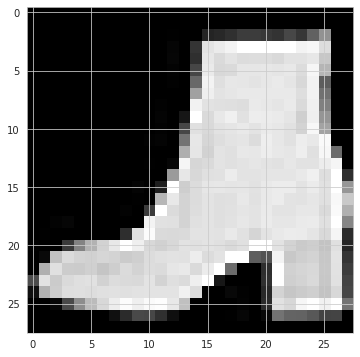

In [35]:
import random
a = random.randint(0,len(X_train))
print("index number : " + str(a))
print ("shape " + str(X_train[a].shape))
plt.imshow(X_train[a],cmap='gray')

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [36]:
print("min = " + str(X_train[a].min()))
print("max = " + str(X_train[a].max()))

min = 0
max = 255


In [37]:
# Normalize image pixels
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [38]:
print("min = " + str(X_train[a].min()))
print("max = " + str(X_train[a].max()))

min = 0.0
max = 1.0


index number : 33618
shape (28, 28)


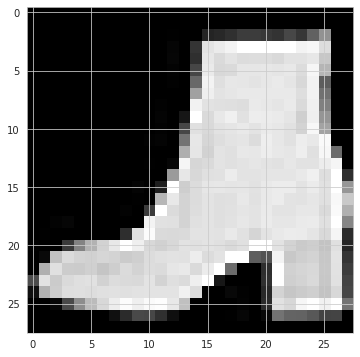

In [39]:
print("index number : " + str(a))
print ("shape " + str(X_train[a].shape))
plt.imshow(X_train[a],cmap='gray')

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [40]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [41]:
X_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [42]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [43]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [44]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [45]:
y_train.shape

(60000,)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [46]:
from tensorflow.keras.utils import to_categorical

In [47]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [48]:
y_train[a]

9

In [80]:
Y_train[a]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [52]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu')) 

model.add(MaxPool2D(pool_size=(2, 2))) 

model.add(Flatten())  #convert the multi-dimensional arrays into flattened one-dimensional arrays

model.add(Dense(128, activation='relu')) #Dense implements the operation: output = activation(dot(input, kernel) + bias) where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True).

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
__________________________________________________

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [54]:
from tensorflow.keras.callbacks import EarlyStopping

In [55]:
early_stop = EarlyStopping(monitor='val_accuracy',mode="max", patience=2, restore_best_weights = True)

In [56]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test),callbacks=[early_stop]) 

Epoch 1/10
1875/1875 [==============================] - 15s 4ms/step - loss: 0.3867 - accuracy: 0.8625 - val_loss: 0.3074 - val_accuracy: 0.8892
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2604 - accuracy: 0.9048 - val_loss: 0.2691 - val_accuracy: 0.9019
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2150 - accuracy: 0.9204 - val_loss: 0.2578 - val_accuracy: 0.9071
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1822 - accuracy: 0.9330 - val_loss: 0.2611 - val_accuracy: 0.9047
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1563 - accuracy: 0.9426 - val_loss: 0.2535 - val_accuracy: 0.9138
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1334 - accuracy: 0.9506 - val_loss: 0.2689 - val_accuracy: 0.9108
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1137 - accuracy: 0.9588 - val_loss: 0.2575 - val_accuracy

In [57]:
X_train.shape

(60000, 28, 28, 1)

In [58]:
Y_train.shape

(60000, 10)

In [59]:
model.metrics_names

['loss', 'accuracy']

In [60]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.387,0.862,0.307,0.889
1,0.260,0.905,0.269,0.902
2,0.215,0.920,0.258,0.907
3,0.182,0.933,0.261,0.905
4,0.156,0.943,0.254,0.914


**TASK 7: Plot values of metrics you used in your model.**

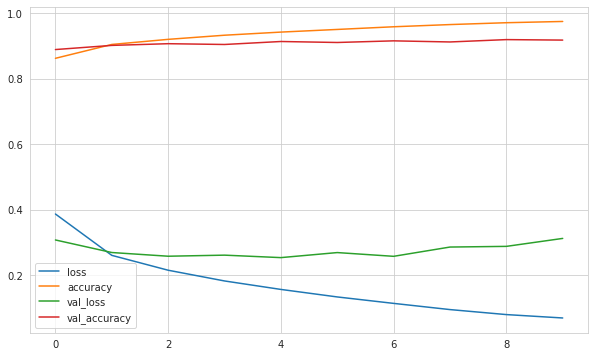

In [61]:
summary.plot();

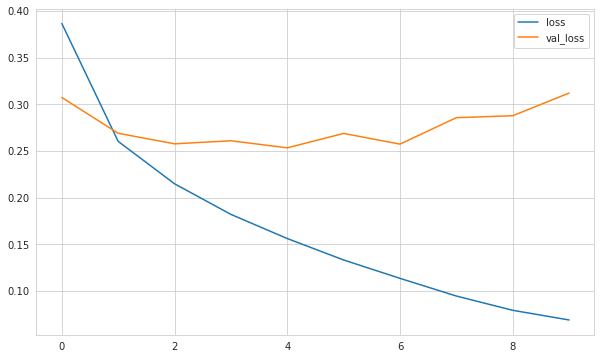

In [62]:
summary[["loss", "val_loss"]].plot();

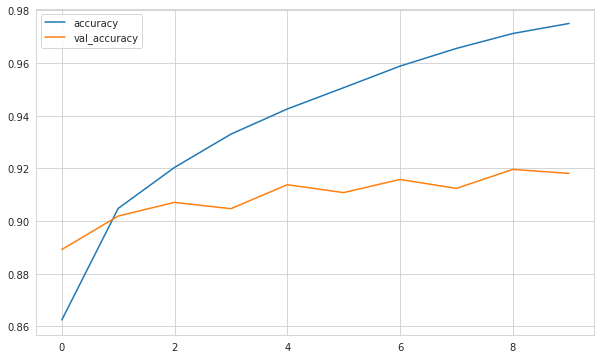

In [63]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [64]:
from sklearn.metrics import classification_report, confusion_matrix,multilabel_confusion_matrix

In [65]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3122 - accuracy: 0.9181


[0.3121803402900696, 0.9180999994277954]

In [66]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3121803402900696
Test accuracy: 0.9180999994277954


In [67]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 1s 2ms/step


array([[5.7730976e-09, 2.3547416e-12, 2.1682174e-09, ..., 4.3771165e-06,
        3.7735109e-08, 9.9999559e-01],
       [5.5961982e-07, 6.7144136e-18, 9.9999940e-01, ..., 1.9494613e-21,
        3.8553725e-15, 4.5918621e-19],
       [9.6957259e-14, 1.0000000e+00, 1.0921889e-16, ..., 5.2067770e-27,
        1.3359825e-19, 2.4987918e-27],
       ...,
       [3.8014275e-15, 1.1057790e-18, 1.8886196e-13, ..., 2.9858199e-14,
        1.0000000e+00, 5.9342811e-16],
       [3.1992161e-13, 1.0000000e+00, 6.8869343e-16, ..., 6.5654360e-26,
        3.6010228e-18, 3.5188955e-17],
       [1.7102712e-06, 2.6812066e-07, 2.0708560e-04, ..., 8.6033077e-04,
        1.8868019e-04, 5.7525773e-05]], dtype=float32)

In [68]:
pred_prob.shape

(10000, 10)

In [69]:
pred_prob[0]

array([5.7730976e-09, 2.3547416e-12, 2.1682174e-09, 4.6876279e-12,
       6.0803362e-09, 2.3608983e-08, 1.8047219e-10, 4.3771165e-06,
       3.7735109e-08, 9.9999559e-01], dtype=float32)

In [70]:
np.argmax(pred_prob[0])

9

In [71]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [74]:
y_pred.shape

(10000,)

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86      1000
           1       0.99      0.99      0.99      1000
           2       0.86      0.88      0.87      1000
           3       0.93      0.91      0.92      1000
           4       0.86      0.89      0.88      1000
           5       0.98      0.99      0.98      1000
           6       0.76      0.79      0.77      1000
           7       0.96      0.98      0.97      1000
           8       0.98      0.99      0.98      1000
           9       0.98      0.95      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [73]:
print(confusion_matrix(y_test, y_pred))

[[828   2  28  14   4   1 117   0   6   0]
 [  1 987   2   6   2   0   2   0   0   0]
 [ 11   1 875   5  63   0  44   0   1   0]
 [ 12   6  18 909  11   0  41   0   3   0]
 [  0   2  41  24 888   0  45   0   0   0]
 [  0   0   1   1   0 988   0   8   0   2]
 [ 64   3  57  18  60   0 788   0  10   0]
 [  0   0   0   0   0   7   0 977   0  16]
 [  1   1   0   5   0   2   2   1 988   0]
 [  1   0   0   0   0  10   0  36   0 953]]


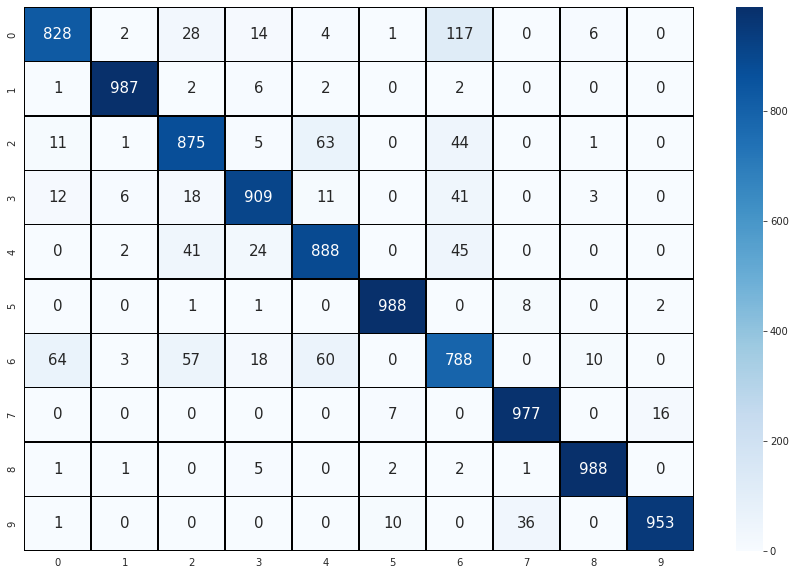

In [75]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

In [76]:
y_test != y_pred

array([False, False, False, ..., False, False, False])

In [77]:
(y_test != y_pred).sum()

819

# MODEL 2

In [ ]:
model = Sequential()


model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu')) 

model.add(MaxPool2D(pool_size=(2, 2))) 

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Prediction

index number : 5829
shape (28, 28, 1)


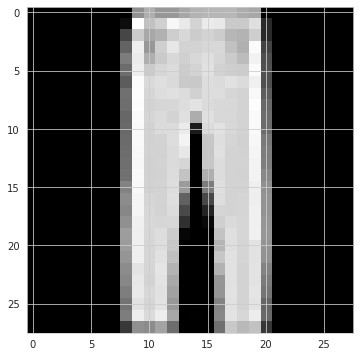

In [104]:
test = random.randint(0,len(X_test))
print("index number : " + str(test))
print ("shape " + str(X_test[test].shape))
plt.imshow(X_test[test].reshape(28,28),cmap='gray')

In [105]:
pred_prob = model.predict(X_test[test].reshape(1,28,28,1))
pred_prob

1/1 [==============================] - 0s 14ms/step


array([[1.5687115e-11, 1.0000000e+00, 7.9089093e-14, 1.1580931e-14,
        7.4226751e-15, 2.3179803e-19, 2.2104701e-15, 3.8751085e-20,
        2.3402480e-17, 1.1007980e-22]], dtype=float32)

In [106]:
y_pred = np.argmax(pred_prob)
y_pred

1

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___